In [53]:
import pandas as pd
data = pd.read_csv("train.csv",encoding = 'ISO-8859-1', index_col=0)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

start_col = 0
n = data.shape[0]
p=data.shape[1] - start_col
X=data.loc[:, data.columns[start_col]:data.columns[start_col + p - 1]].to_numpy().reshape([n,p])
print(X.shape)

(42000, 784)


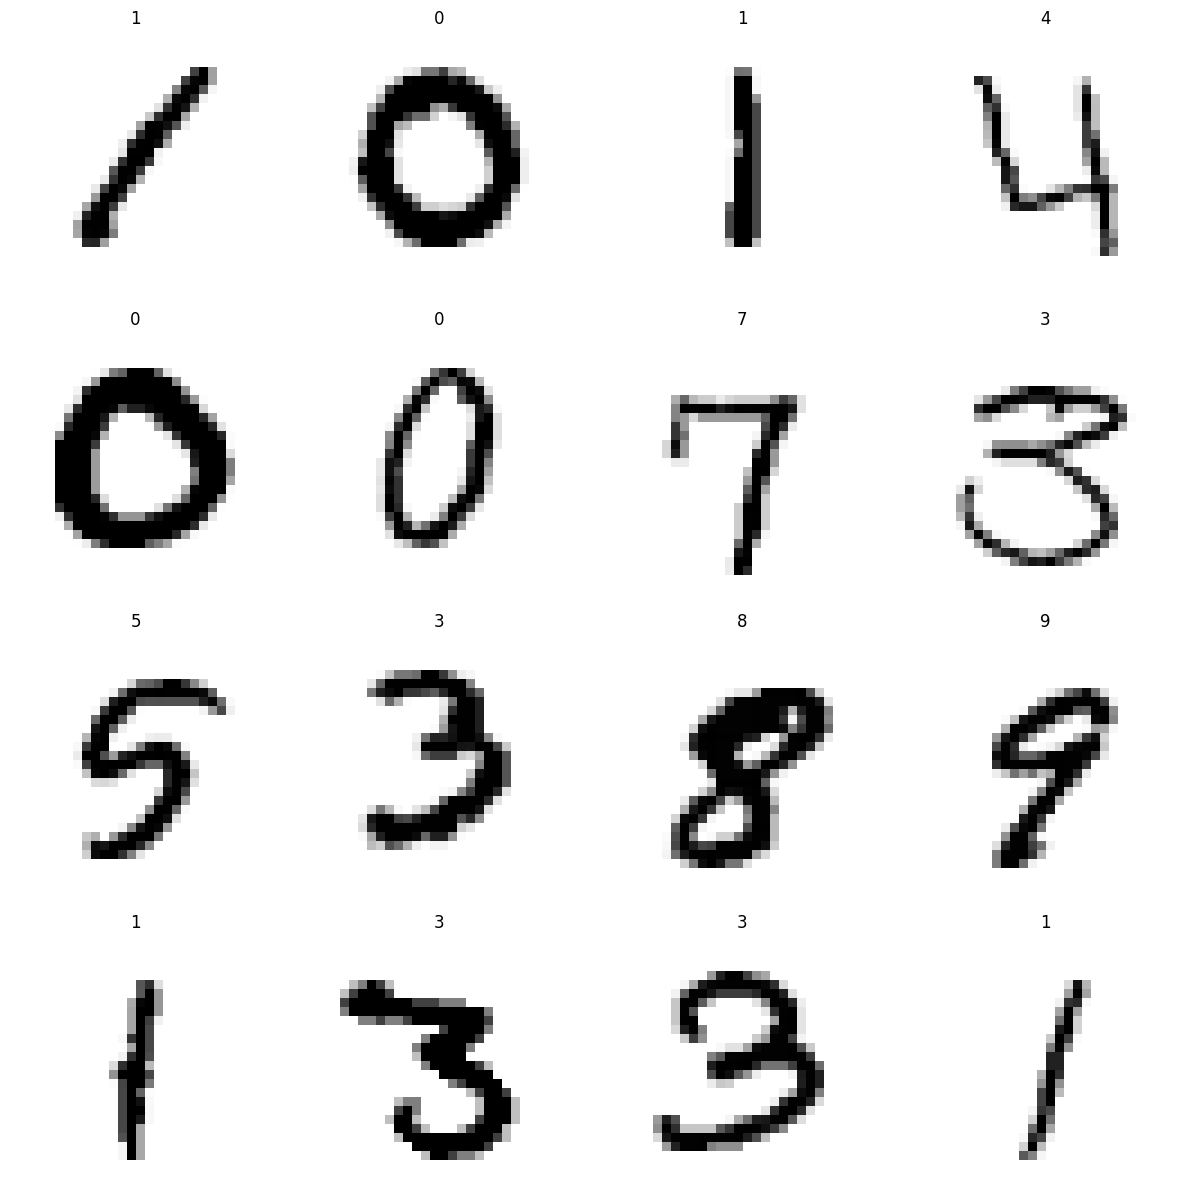

In [68]:
def im_array(L):
    IM = []
    for i in range(28):
        x = []
        for j in range(28):
            x.append(L[28*i + j])
        IM.append(x)
    return IM

def plot_multi(data, target, i):
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(im_array(data[i+j]), cmap='binary')
        plt.title(target[i+j])
        plt.axis('off')
    plt.show()

plot_multi(X, data.index, 0)

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

mlp.fit(X,data.index)

Iteration 1, loss = 1.64785248
Iteration 2, loss = 1.49729662
Iteration 3, loss = 1.47886670
Iteration 4, loss = 1.59127034
Iteration 5, loss = 1.68936580
Iteration 6, loss = 1.51965151
Iteration 7, loss = 1.85469778
Iteration 8, loss = 1.78253818
Iteration 9, loss = 1.78622983
Iteration 10, loss = 1.74437332
Iteration 11, loss = 1.57049029
Iteration 12, loss = 1.59393184
Iteration 13, loss = 1.59835620
Iteration 14, loss = 1.44924540
Iteration 15, loss = 1.45493772
Iteration 16, loss = 1.41634288
Iteration 17, loss = 1.44771073
Iteration 18, loss = 1.36587670
Iteration 19, loss = 1.32185968
Iteration 20, loss = 1.25697009
Iteration 21, loss = 1.35750872
Iteration 22, loss = 1.45035738
Iteration 23, loss = 1.34915264
Iteration 24, loss = 1.23609073
Iteration 25, loss = 1.25517217
Iteration 26, loss = 1.30556823
Iteration 27, loss = 1.38123637
Iteration 28, loss = 1.38413629
Iteration 29, loss = 1.31553410
Iteration 30, loss = 1.20154120
Iteration 31, loss = 1.21640003
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [63]:
test = np.genfromtxt('test.csv', delimiter=',')
test = test[1:]

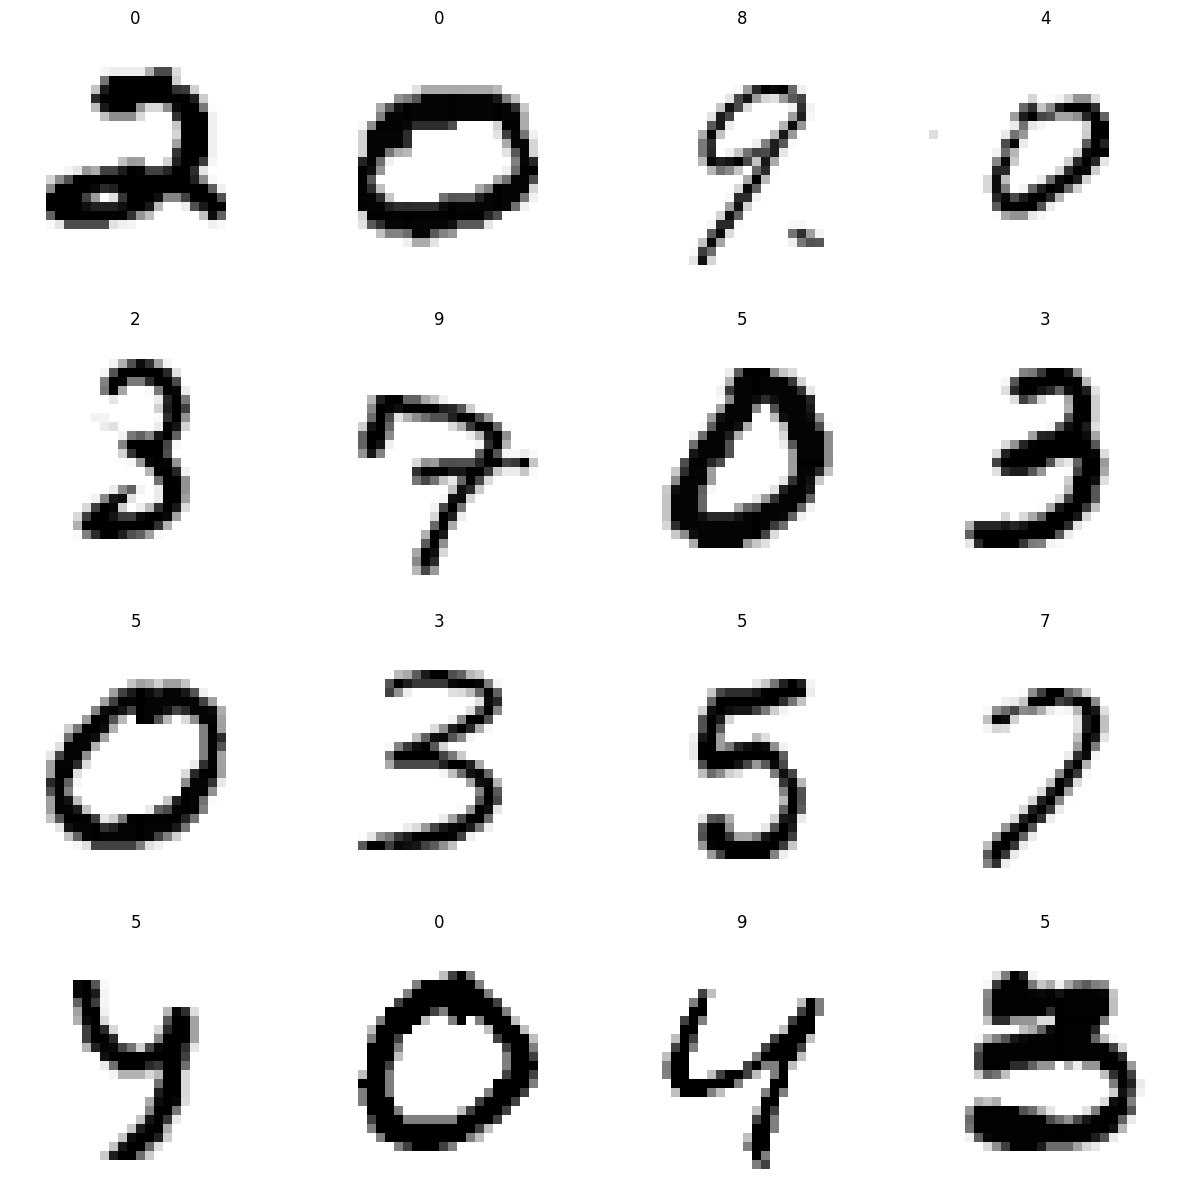

In [69]:
prediction = mlp.predict(test)

plot_multi(test, prediction, 0)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(test, prediction)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets